## Website Performance Analysis - Time Series

Web Sitesi Performans Analizi, bir web sitesinin işlevselliği, kullanıcı katılımı ve iş hedeflerine ulaşmadaki genel başarısıyla ilgili çeşitli ölçümleri değerlendirmeyi içerir. Bu analiz biçimi kritiktir çünkü kullanıcı deneyimini, dönüşüm oranlarını ve bir işletmenin karlılığını ve itibarını doğrudan etkiler.

### Sütunlar Hakkında Bilgi

* **Channel group:** Kullanıcıların web sitenizi hangi kanal üzerinden ziyaret ettiğini gösterir. Bu sütun, kullanıcıların geldiği kaynakları (örneğin, organik arama, sosyal medya, doğrudan trafik) temsil eder ve metin verisi içerir.

* **Date:** Tarih ve saat bilgisini içerir. 

* **Users:** Belirli bir zaman diliminde web sitenizi ziyaret eden benzersiz kullanıcı sayısını gösterir.

* **Sessions:** Kullanıcıların belirli bir zaman diliminde web sitenizi ziyaret ettiği toplam oturum sayısını ifade eder.

* **Engaged sessions:** Kullanıcıların belirli bir süre boyunca etkileşimde bulunduğu oturum sayısını belirtir.

* **Average engagement time per session:** Her oturum başına ortalama etkileşim süresini gösterir. Bu değer, kullanıcıların ne kadar süre siteyle etkileşimde bulunduğunu ölçer.

* **Engaged sessions per user:** Her kullanıcı başına düşen etkileşimde bulunan oturum sayısını ifade eder.

* **Events per session:** Her oturum başına kaydedilen etkinlik sayısını gösterir. Bu etkinlikler, tıklamalar, video izlemeleri veya diğer kullanıcı etkileşimleri olabilir.

* **Engagement rate:** Kullanıcıların etkileşimde bulunduğu oturumların toplam oturum sayısına oranını belirtir.

* **Event count:** Belirli bir zaman diliminde kaydedilen toplam etkinlik sayısını ifade eder.

<img src='website.jpeg' width=550 >

### Kütüphanelerimizi yüklüyoruz

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime

In [74]:
df=pd.read_csv('data-export.csv', skiprows=1)
#Dosyamızı okuyoruz.Sütunların başlıklarını düzeltiyoruz.

### EDA - Exploratory Data Analysis - Keşifçi Veri Analizi

In [3]:
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [75]:
df.rename(columns={'Session primary channel group (Default channel group)': 'Channel_group', 
                   'Date + hour (YYYYMMDDHH)': 'Date'}, inplace=True)
#İki tane sütunun adını değiştiriyorum.

In [54]:
df.shape

(3182, 10)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Channel_group                        3182 non-null   object 
 1   Date                                 3182 non-null   int64  
 2   Users                                3182 non-null   int64  
 3   Sessions                             3182 non-null   int64  
 4   Engaged sessions                     3182 non-null   int64  
 5   Average engagement time per session  3182 non-null   float64
 6   Engaged sessions per user            3182 non-null   float64
 7   Events per session                   3182 non-null   float64
 8   Engagement rate                      3182 non-null   float64
 9   Event count                          3182 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 248.7+ KB


In [56]:
df.describe()

,Date,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3.182000e+03,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2.024043e+09,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470
std,2.695099e+03,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313
min,2.024041e+09,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.024041e+09,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000
50%,2.024042e+09,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000
75%,2.024043e+09,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000
max,2.024050e+09,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000


In [76]:
df['Date']=pd.to_datetime(df['Date'], format='%Y%m%d%H')

In [77]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['Hour']=df['Date'].dt.hour

In [59]:
df.head()

,Channel_group,Date,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Day,Month,Year,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,16,4,2024,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,17,4,2024,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,17,4,2024,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,17,4,2024,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,17,4,2024,20


## Veri Görselleştirmesi

### Channel Group Sütunu Hakkında Bilgi

* Direct:Kullanıcıların doğrudan URL yazarak veya yer imleri aracılığıyla siteye gelmesi.
    
* Organic Search:Arama motorları (Google, Bing, vb.) üzerinden organik sonuçlarla siteye gelen kullanıcılar.

* Organic Social:Sosyal medya platformları (Facebook, Twitter, Instagram, vb.) üzerinden organik olarak gelen kullanıcılar.

* Referral:Diğer web siteleri üzerinden bağlantılar aracılığıyla gelen kullanıcılar.

* Unassigned:Hiçbir kanala atanmayan veya izlenemeyen kullanıcılar.

* Organic Video:Video platformları (YouTube, Vimeo, vb.) üzerinden gelen kullanıcılar.

* Email:E-posta kampanyaları aracılığıyla gelen kullanıcılar.

In [11]:
df['Channel_group'].value_counts()

Channel_group
Direct            672
Organic Social    672
Organic Search    672
Referral          672
Unassigned        366
Organic Video     125
Email               3
Name: count, dtype: int64

In [12]:
df['Month'].value_counts()

Month
4    2838
5     344
Name: count, dtype: int64

In [13]:
df['Year'].value_counts()

Year
2024    3182
Name: count, dtype: int64

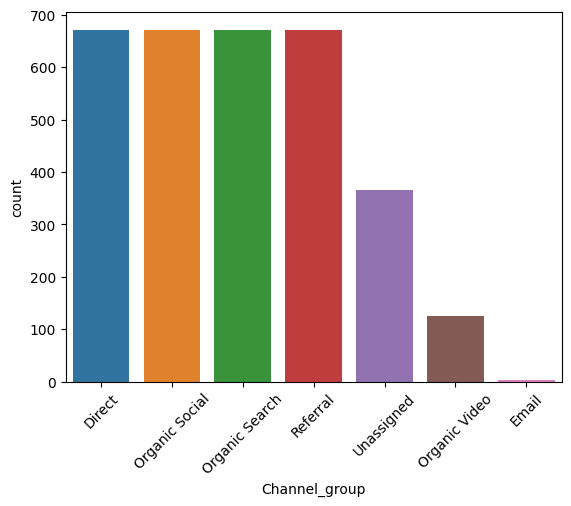

In [14]:
sns.countplot(x=df['Channel_group'])
plt.xticks(rotation=45);

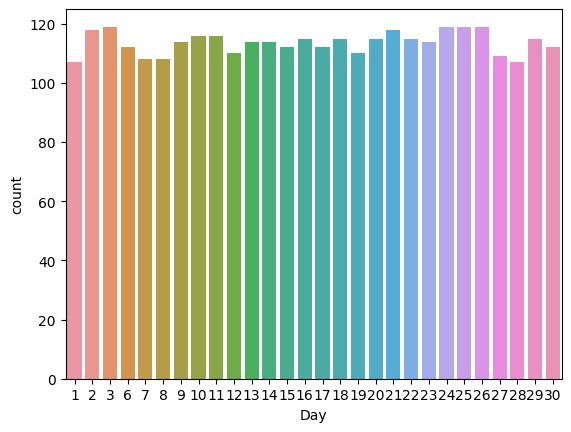

In [15]:
sns.countplot(x=df['Day']);

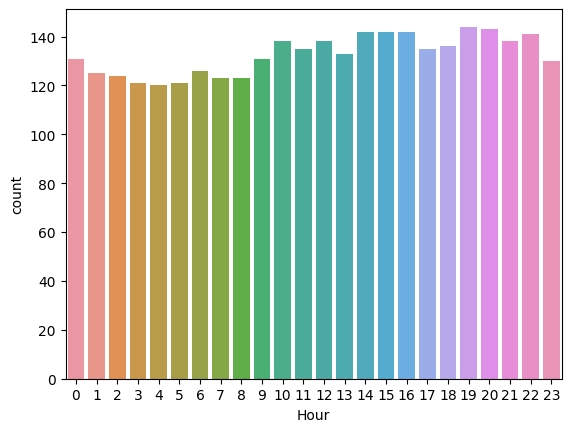

In [16]:
sns.countplot(x=df['Hour']);

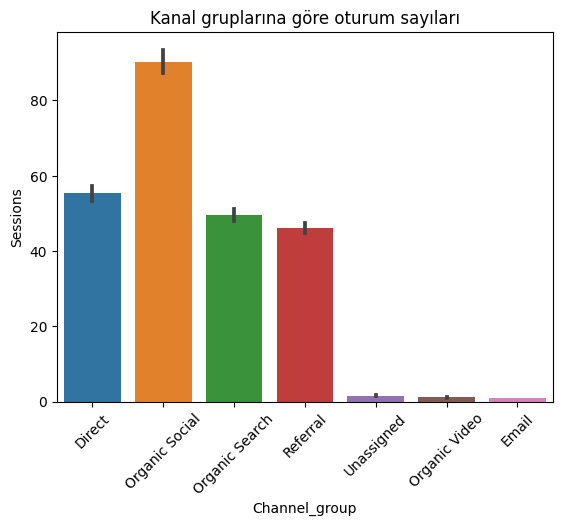

In [17]:
sns.barplot(x='Channel_group', y='Sessions', data=df)
plt.xticks(rotation=45);
plt.title('Kanal gruplarına göre oturum sayıları');

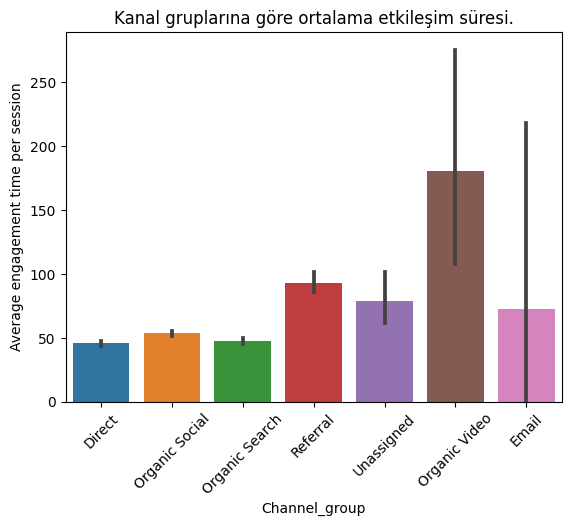

In [18]:
sns.barplot(data=df, x='Channel_group', y='Average engagement time per session')
plt.xticks(rotation=45)
plt.title('Kanal gruplarına göre ortalama etkileşim süresi.');

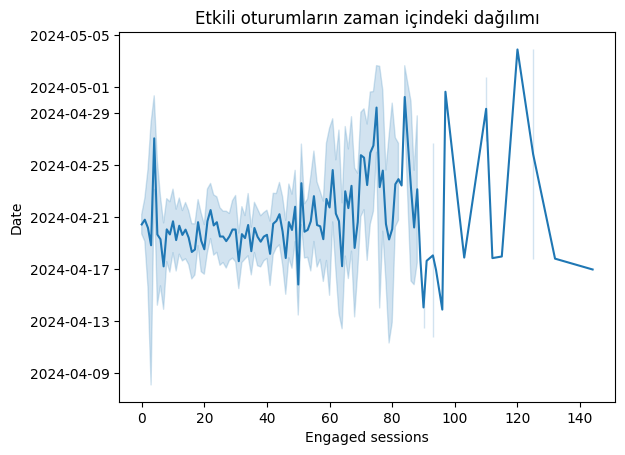

In [19]:
sns.lineplot(x=df['Engaged sessions'], y=df['Date']);
plt.title('Etkili oturumların zaman içindeki dağılımı');

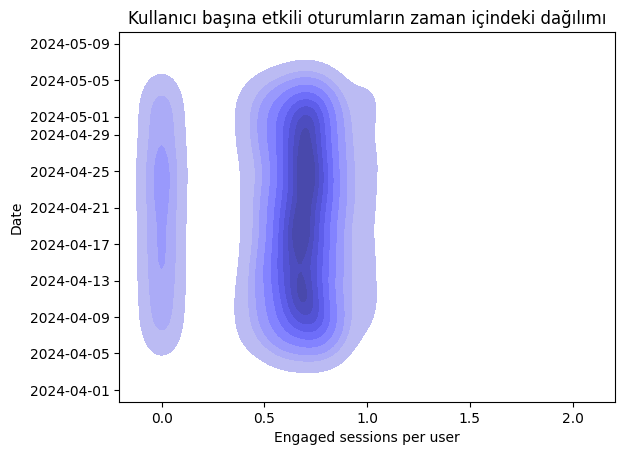

In [20]:
sns.kdeplot(x=df['Engaged sessions per user'], y=df['Date'], fill=True, color='blue');
plt.title('Kullanıcı başına etkili oturumların zaman içindeki dağılımı');

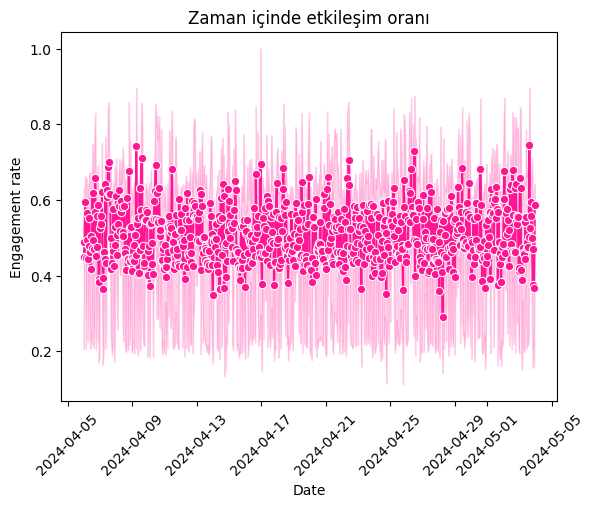

In [21]:
sns.lineplot(x='Date', y='Engagement rate', data=df, marker='o', color='#FF1493')
plt.xticks(rotation=45)
plt.title('Zaman içinde etkileşim oranı');

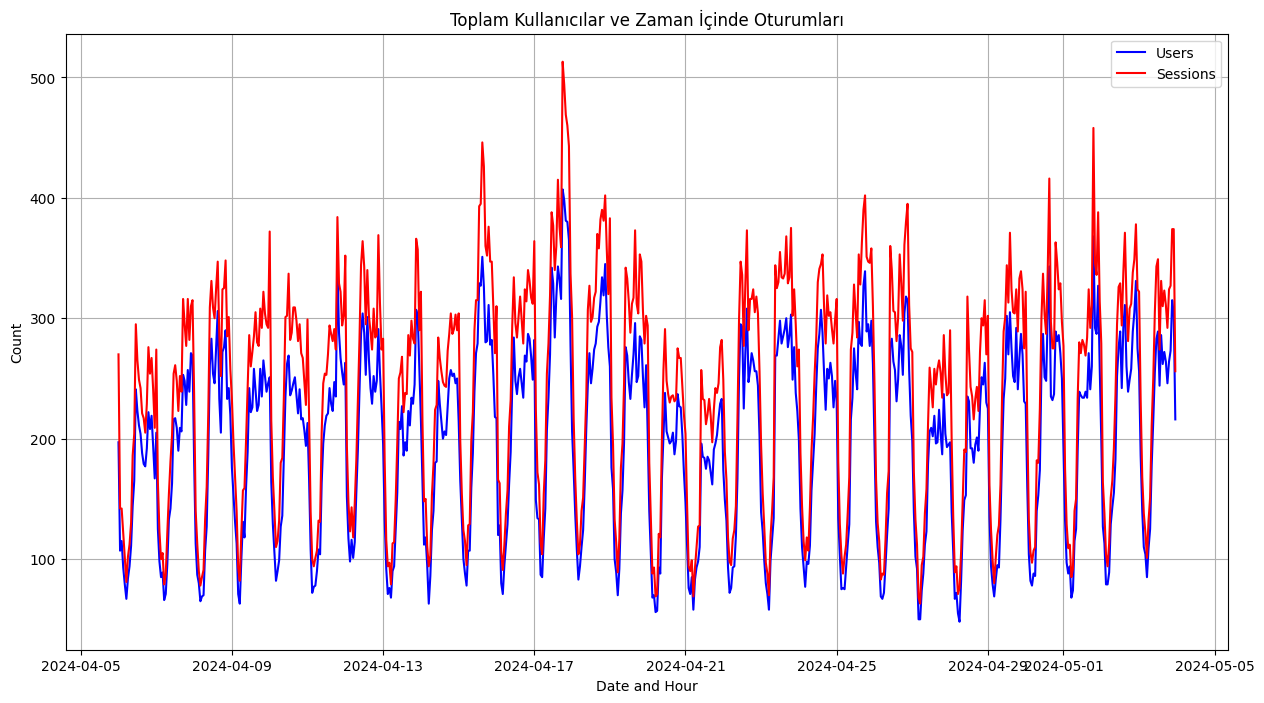

In [22]:
total_users=df.groupby(df['Date']).agg({'Users': 'sum', 'Sessions': 'sum'})

plt.figure(figsize=(15,8))
plt.plot(total_users.index, total_users['Users'], label='Users', color='blue')
plt.plot(total_users.index, total_users['Sessions'], label='Sessions', color='red')
plt.title('Toplam Kullanıcılar ve Zaman İçinde Oturumları')
plt.xlabel('Date and Hour')
plt.ylabel('Count')

plt.grid(True)
plt.legend()
plt.show()

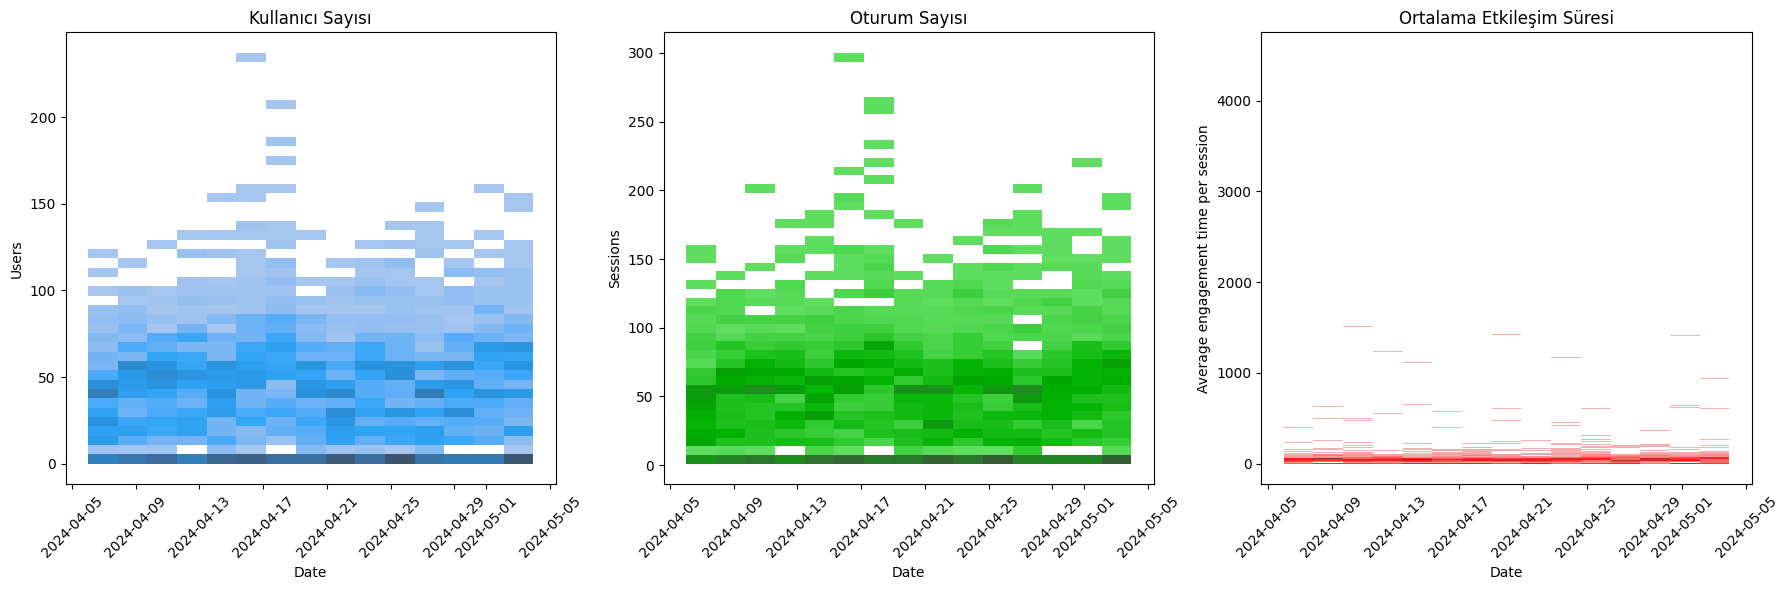

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

#Kullanıcı sayısının zamana göre değişimi
sns.histplot(x=df['Date'], y=df['Users'], ax=axs[0])
axs[0].set_title('Kullanıcı Sayısı')
axs[0].set_xticks(axs[0].get_xticks())  
axs[0].tick_params(axis='x', rotation=45)

#Oturum sayısının zamana göre değişimi
sns.histplot(x=df['Date'], y=df['Sessions'], color='green', ax=axs[1])
axs[1].set_title('Oturum Sayısı')
axs[1].set_xticks(axs[1].get_xticks())
axs[1].tick_params(axis='x', rotation=45)

#Ortalama etkileşim süresinin zaman içindeki dağılımı
sns.histplot(x=df['Date'], y=df['Average engagement time per session'], color='red', ax=axs[2])
axs[2].set_title('Ortalama Etkileşim Süresi')
axs[2].set_xticks(axs[2].get_xticks())
axs[2].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

In [24]:
k_e_s = df.groupby(df['Date']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'})

# Etkileşim metriklerini(yukarıdaki verdiğimiz sütunlar) ortalamasını alarak inceleme yapıyoruz.

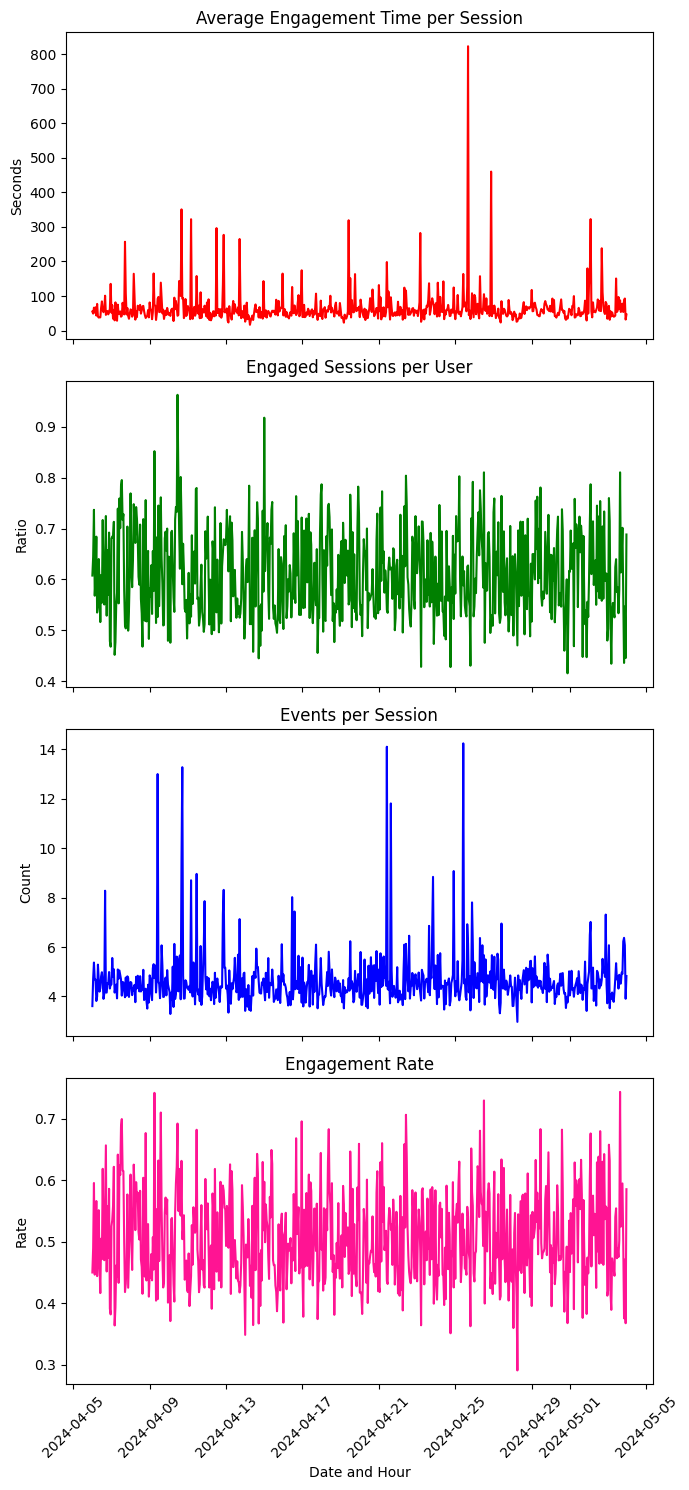

In [25]:
fig, ax = plt.subplots(4, 1, figsize=(7, 15), sharex=True)

#1.grafik
ax[0].plot(k_e_s.index, k_e_s['Average engagement time per session'], label='Avg Engagement Time', color='red')
ax[0].set_title('Average Engagement Time per Session')
#Her oturumda kullanıcıların ortalama ne kadar süre siteyle etkileşimde kaldığı
ax[0].set_ylabel('Seconds')

#2.grafik
ax[1].plot(k_e_s.index, k_e_s['Engaged sessions per user'], label='Engaged Sessions/User', color='green')
ax[1].set_title('Engaged Sessions per User')
#Kullanıcı başına düşen aktif etkileşimde bulunulan oturum sayısı
ax[1].set_ylabel('Ratio')

#3.grafik
ax[2].plot(k_e_s.index, k_e_s['Events per session'], label='Events per Session', color='blue')
ax[2].set_title('Events per Session')
#Her oturumda kaç tane olay (event) gerçekleştiği
ax[2].set_ylabel('Count')

#4.grafik
ax[3].plot(k_e_s.index, k_e_s['Engagement rate'], label='Engagement Rate', color='#FF1493')
ax[3].set_title('Engagement Rate')
#Etkileşimde bulunan oturumların toplam oturumlara oranı
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

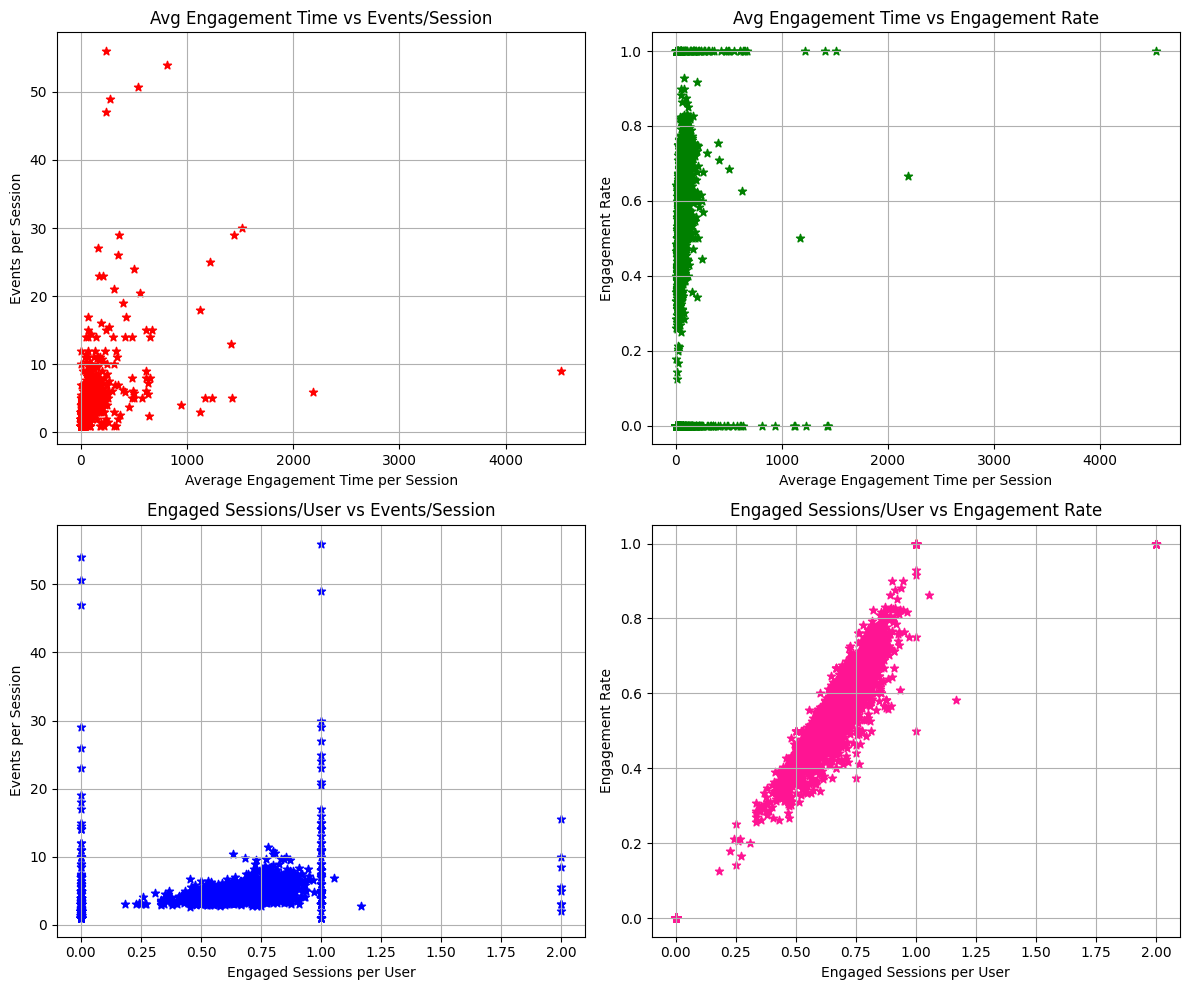

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#1.grafik:Ortalama etkileşim süresi ile oturum başına etkinlikler grafiği.
axes[0, 0].scatter(df['Average engagement time per session'], df['Events per session'], color='red',marker='*')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  

#2.grafik:Ortalama etkileşim süresi ile etkileşim oranı grafiği
axes[0, 1].scatter(df['Average engagement time per session'], df['Engagement rate'], color='green',marker='*')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

#3.grafik: Kullanıcı başına etkili oturumlar ile oturum başına etkinlikler grafiği
axes[1, 0].scatter(df['Engaged sessions per user'], df['Events per session'], color='blue',marker='*')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

#4.grafik: Kullanıcı başına etkili oturumlar ile etkileşim oranı grafiği
axes[1, 1].scatter(df['Engaged sessions per user'], df['Engagement rate'], color='#FF1493',marker='*')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [27]:
c_p=df.groupby('Channel_group').agg({
    'Users': 'sum','Sessions': 'sum','Engaged sessions': 'sum','Engagement rate': 'mean','Events per session': 'mean'})

# Normalizasyon
c_p['Normalized Engagement Rate']=c_p['Engagement rate'] / c_p['Engagement rate'].max()
c_p['Normalized Events per Session']=c_p['Events per session'] / c_p['Events per session'].max()

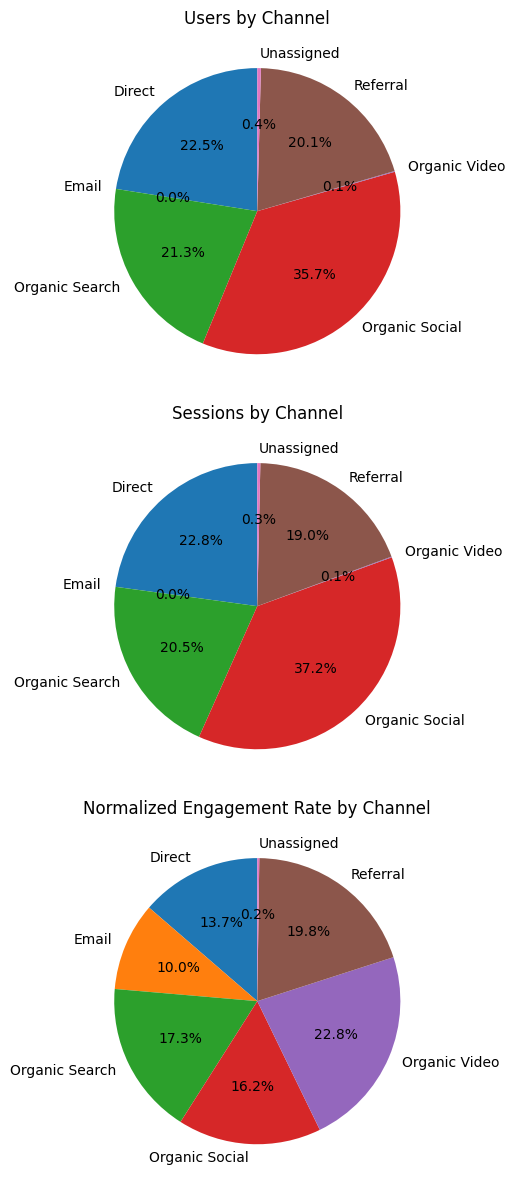

In [28]:
fig, ax=plt.subplots(3, 1, figsize=(6, 12))

# Kullanıcılar için pasta grafiği
ax[0].pie(c_p['Users'], labels=c_p.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Users by Channel')

# Oturumlar için pasta grafiği
ax[1].pie(c_p['Sessions'], labels=c_p.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Sessions by Channel')

# Normalleştirilmiş etkileşim oranı için pasta grafiği
ax[2].pie(c_p['Normalized Engagement Rate'], labels=c_p.index, autopct='%1.1f%%', startangle=90)
ax[2].set_title('Normalized Engagement Rate by Channel')

plt.tight_layout()
plt.show()

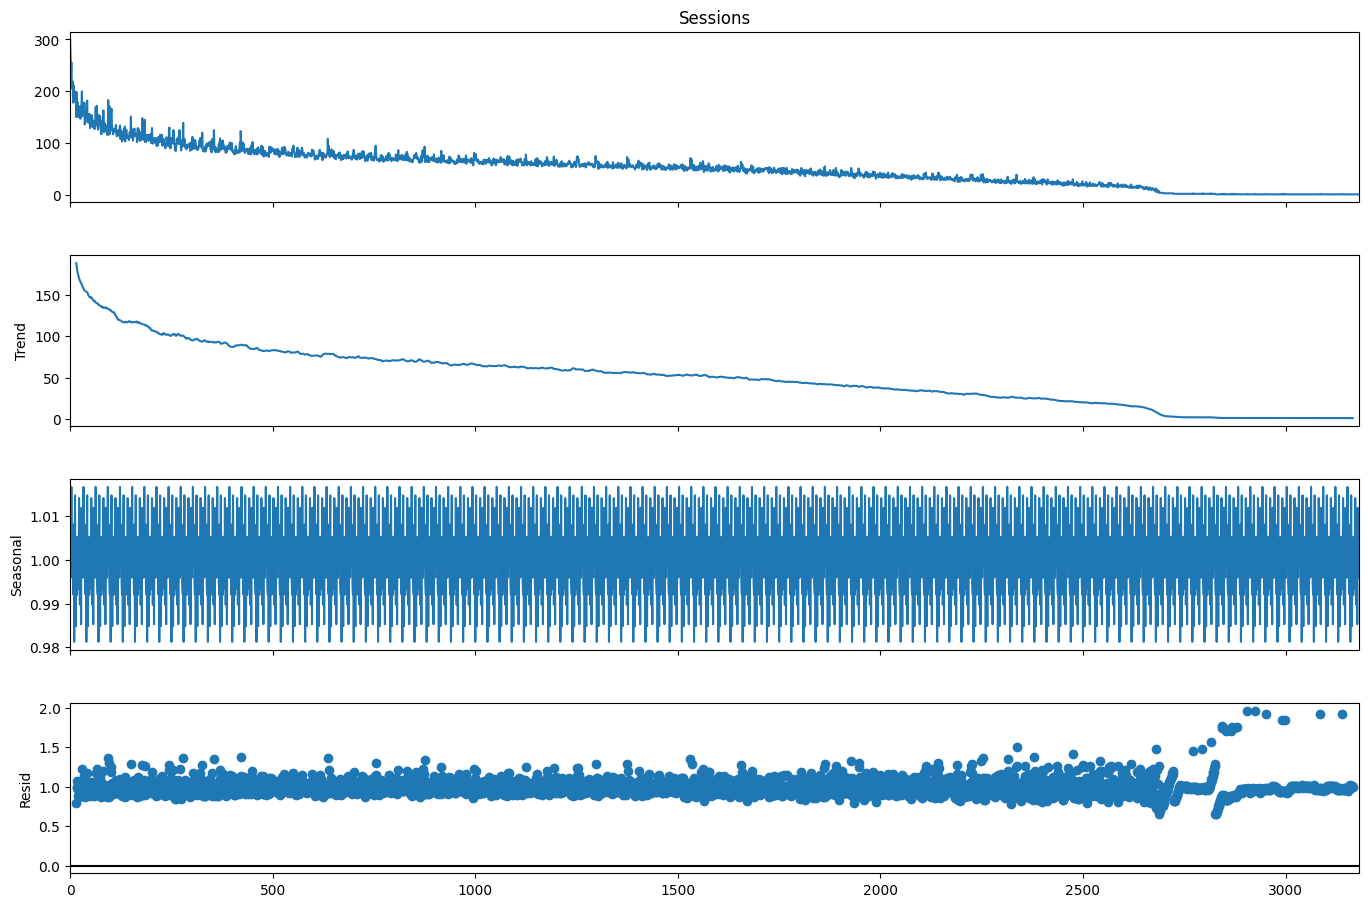

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Sessions'],model='multiplicative',period=30)
fig=result.plot()
fig.set_size_inches(15,10)

Bu grafikte dört farklı bileşen görüyoruz: observed (gözlenen veri), trend, seasonal (mevsimsellik) ve residual (kalan) bileşenler. Bu bileşenlerin her biri zaman serisinin farklı bir yönünü ortaya çıkarır. Şimdi her bileşeni ayrı ayrı inceleyelim:

1. Observed (Gözlenen Veri - En Üstteki Grafik)
Bu grafik, zaman serisinde oturum sayısının (sessions) doğrudan gözlenen ham verisini gösteriyor.
Başlangıçta oturum sayısında yüksek bir seviye var, ancak zamanla azalma eğilimi gösteriyor. Verinin dalgalanmaları mevcut, ancak genel bir azalan trend olduğu net bir şekilde gözüküyor.
2. Trend (İkinci Grafik)
Bu bileşen, verideki genel uzun vadeli trendi gösterir.
Grafikte, oturum sayısının başlarda yüksek olup zamanla düzenli bir şekilde azaldığı görülüyor. Bu, kullanıcı oturumlarının zamanla düşüş eğiliminde olduğunu gösteriyor. Sonlara doğru trend sıfıra yaklaşıyor, bu da büyük bir düşüş veya tamamen oturum kaybı olabileceğini işaret ediyor.
3. Seasonal (Mevsimsel - Üçüncü Grafik)
Bu bileşen, zaman serisinde düzenli tekrar eden mevsimsel kalıpları gösterir.
Mevsimsellik bileşeni grafiğinde, yaklaşık 30 günlük bir periyotta düzenli dalgalanmalar var. Bu, kullanıcı davranışlarının her ay veya belirli aralıklarla tekrar eden bir düzen izlediğini gösteriyor. Yani kullanıcı aktivitelerinde bir mevsimsellik etkisi mevcut ve bu da belirli dönemlerde oturumlarda tekrarlayan artış ve azalışların yaşandığını ifade eder.
4. Residual (Artıklar - Son Grafik)
Bu grafik, trend ve mevsimsellik çıkarıldıktan sonra kalan veriyi gösterir. Bu kalan bileşen genellikle verideki anomalileri ve gürültüyü temsil eder.
Residual bileşeninde veride az da olsa dalgalanmalar gözleniyor. Ancak bu dalgalanmalar genel olarak küçük ve çok büyük sapmalar içermiyor, bu da modelin veriyi iyi bir şekilde açıklayabildiğini gösteriyor. Yine de bazı artışlar ve düşüşler dikkat çekici olabilir.

**Genel Yorum:** 
* Trend: Veride genel olarak oturum sayısında bir düşüş eğilimi var. Bu, kullanıcı katılımında zamanla bir azalma olabileceğini gösterebilir.
* Mevsimsellik: Veride düzenli olarak tekrar eden mevsimsel dalgalanmalar var. Bu da kullanıcı aktivitelerinde belirli periyodik davranışlar (örneğin hafta içi/hafta sonu, aylık döngüler) olduğunu işaret ediyor.
* Residual: Kalan veride fazla bir anormallik veya büyük sapmalar gözükmüyor, ancak ince dalgalanmalar mevcut.
Bu sonuçlar, web sitesindeki kullanıcı davranışlarının zamanla değiştiğini ve kullanıcı etkileşimlerinde bir mevsimsel yapı olduğunu ortaya koyuyor. Bu mevsimsellik dönemlerine göre stratejiler geliştirilebilir (örneğin belirli dönemlerde kampanyalar düzenlemek), ayrıca genel düşüş trendini iyileştirme yönünde aksiyonlar alınabilir.

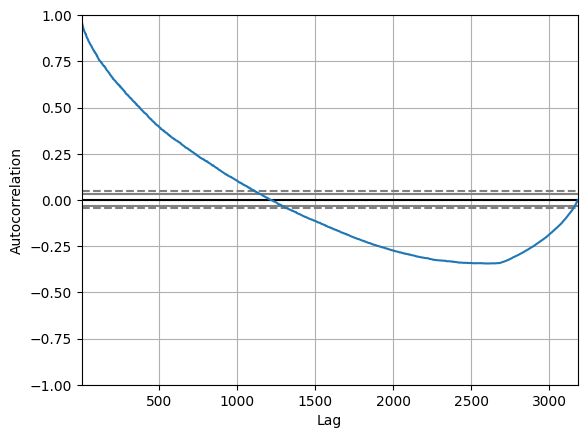

In [30]:
pd.plotting.autocorrelation_plot(df['Sessions']);

Bu grafikte otokorelasyon fonksiyonunu (ACF) görüyoruz. Otokorelasyon, bir zaman serisinde bir değerin, belirli bir gecikmeyle (lag) kendi geçmiş değerleriyle olan korelasyonunu ölçer.


* Başlangıç Değerleri Yüksek (Pozitif Otokorelasyon):Gecikmenin (lag) küçük olduğu, yani zaman serisindeki verilerin birbirine yakın olduğu dönemlerde otokorelasyon oldukça yüksek (yaklaşık 1’e yakın). Bu, zaman serisinin ilk zaman dilimlerinde güçlü bir otokorelasyon olduğunu, yani önceki değerlerin sonraki değerleri iyi tahmin ettiğini gösterir.Başka bir deyişle, seride kısa vadeli bir ilişki var. Örneğin, bir önceki gün veya saat içerisindeki oturum sayısı, sonraki zaman dilimindeki oturum sayısını iyi bir şekilde tahmin ediyor olabilir.

* Zamanla Otokorelasyonun Azalması:Gecikme arttıkça, otokorelasyon düşmeye başlıyor ve sıfıra yaklaşıyor. Bu, zaman ilerledikçe, önceki değerlerin (uzun vadeli gecikmelerde) mevcut değerler üzerindeki etkisinin azaldığını gösterir. Yani, çok uzun süre önceki değerlerin, şimdiki değerleri tahmin etmekte artık etkili olmadığını ifade eder.

* Gecikme Sayısının Artmasıyla Negatif Otokorelasyon:Gecikme sayısı 1500'den sonra otokorelasyon negatife doğru gidiyor ve bir noktada negatif korelasyon gösteriyor. Bu, zaman serisinde uzun dönem gecikmelerde değerler arasında ters bir ilişki olabileceğini gösterir. Yani, uzun süre önceki yüksek bir değer, gelecekte düşük bir değere karşılık gelebilir.

* Yatay Siyah Çizgiler - Anlamlılık Düzeyi:Grafikteki siyah kesikli çizgiler, %95 güven aralığını temsil eder. Otokorelasyon katsayısı bu çizgilerin dışına çıktığında, korelasyonun istatistiksel olarak anlamlı olduğu kabul edilir.Burada otokorelasyon grafiği başlangıçta güven aralıklarının dışına çıkıyor, ancak gecikme arttıkça güven aralığının içine giriyor. Bu da zaman serisinde kısa vadede anlamlı bir otokorelasyon olduğunu, fakat zamanla bu ilişkinin zayıfladığını ve anlamsız hale geldiğini gösterir.

**Genel Yorum:** Bu grafikten, verinin başlangıçta güçlü bir otokorelasyona sahip olduğunu (yani kısa vadede değerlerin birbirini güçlü bir şekilde etkilediğini) ve zamanla bu ilişkinin zayıfladığını söyleyebiliriz. Zaman serisinde belirli bir noktadan sonra önceki değerlerin mevcut değerleri tahmin etme gücü azalıyor ve bu durum uzun vadede sıfıra yaklaşarak anlamsız hale geliyor.


### P - D - Q Değerlerini Hesaplama

In [33]:
#pip install pmdarima

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [34]:
from pmdarima.arima import auto_arima 
model=auto_arima(df['Sessions'], seasonal=True,m=30, suppress_warnings=True)

print("Model Order (p, d, q):", model.order)

Model Order (p, d, q): (1, 1, 2)


In [37]:
time_series = df.set_index('Date')['Sessions']  
result = adfuller(time_series)
print('ADF Statistics:', result[0])
print('p-value:', result[1])

ADF Statistics: -5.233473975171115
p-value: 7.509024272343065e-06


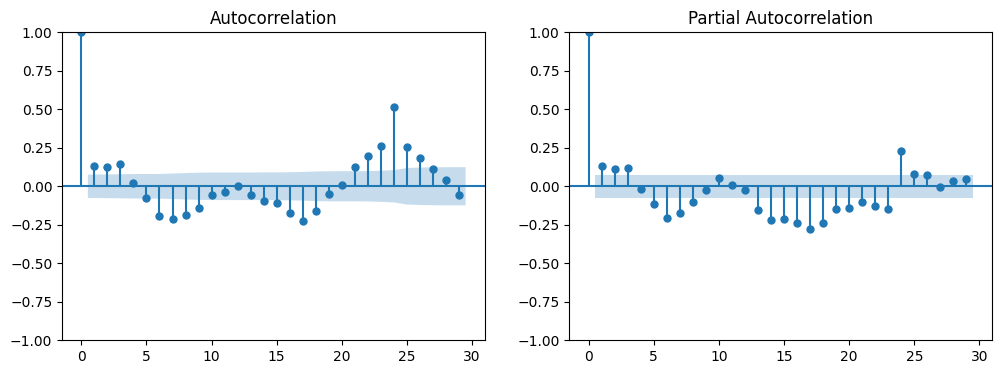

In [32]:
time_series_data = total_users['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

differenced_series = time_series_data.diff().dropna()

# ACF - PACF Grafiği
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()


#asfreq('H'): Veriyi saatlik sıklıkta almak için kullanılır.
#fillna(method='ffill'): Eksik değerleri bir önceki değeri ile doldurur.
#diff(): Zaman serisindeki her bir değerden bir önceki değeri çıkararak seriyi farklılaştırır.
#dropna(): NaN değerleri kaldırır.

### SARIMA

In [78]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sessions'])
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Sessions   No. Observations:                 3182
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -10667.223
Date:                Tue, 24 Sep 2024   AIC                          21338.446
Time:                        08:29:31   BIC                          21350.577
Sample:                             0   HQIC                         21342.797
                               - 3182                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9968      0.001   1976.200      0.000       0.996       0.998
sigma2        47.7146      0.435    109.774      0.000      46.863      48.566
===================================================================================
Ljung-Box (L1) (Q):                 632.61   Jarque-Bera (JB):             24044.51
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
predictions=results.predict(len(df),len(df)+15)
predictions

3182    0.996795
3183    0.993599
3184    0.990415
3185    0.987240
3186    0.984075
3187    0.980921
3188    0.977777
3189    0.974643
3190    0.971519
3191    0.968404
3192    0.965300
3193    0.962206
3194    0.959122
3195    0.956047
3196    0.952983
3197    0.949928
Name: predicted_mean, dtype: float64

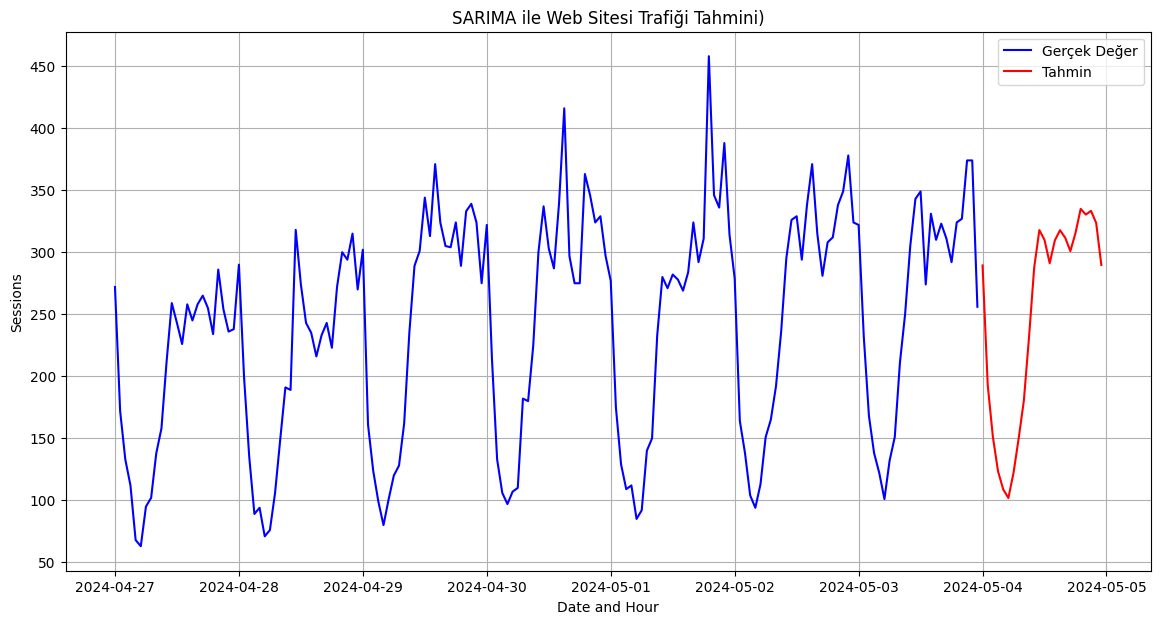

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = total_users['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# SARIMA modelini kullanarak önümüzdeki 24 saati tahmin edin
sarima_forecast = sarima_model_fit.forecast(steps=24)

# Gerçek verileri ve SARIMA tahminini çiziyoruz
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Gerçek Değer', color='blue')  
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Tahmin', color='red')
plt.title('SARIMA ile Web Sitesi Trafiği Tahmini)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()

### Prophet Kütüphanesi

In [84]:
#pip install prophet

In [85]:
forecast_data=df.rename(columns={'Date':'ds','Sessions':'y'})

In [86]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model=Prophet()
model.fit(forecast_data)
forecasts=model.make_future_dataframe(periods=365)
predictions=model.predict(forecasts)
plot_plotly(model,predictions)

08:33:27 - cmdstanpy - INFO - Chain [1] start processing
08:33:27 - cmdstanpy - INFO - Chain [1] done processing


## Özet

Web sitesi performansı, dijital pazarlama stratejilerinin başarısı için kritik öneme sahiptir. Bu projede, web sitesi trafiğini ve performans verilerini analiz ederek gelecekteki ziyaretçi sayısını tahmin etmek için çeşitli zaman serisi modelleri kullanıldı. Kullanılan yöntemler arasında SARIMA ve Prophet yer almaktadır.

SARIMA (Mevsimsel ARIMA): Bu model, ARIMA'nın mevsimsel bileşenler ekleyerek daha iyi tahminler yapmasını sağladı. Web sitesi trafiğindeki mevsimsel dalgalanmaların etkisini başarıyla modelledi.

Prophet: Veri setindeki sütun adları Prophet ile uyumlu hale getirildi. Prophet modeli verilerle oluşturuldu ve eğitildi. Model, tahminler yapmak için gelecekteki 365 günü kapsayan bir zaman aralığı oluşturdu. Tahminler, gelecekteki zaman aralığı için üretildi. Tahmin sonuçları etkileşimli grafiklerle görselleştirildi. Kullanıcı dostu arayüzü ile kullanıcılar zaman serisi verilerini kolayca analiz edebilir ve gelecekteki eğilimleri tahmin edebilirler. Prophet'in hızlı uygulama yeteneği projede zamandan tasarruf sağladı.

Analiz sonucunda her modelin tahmin performansı karşılaştırıldı.SARIMA mevsimsel etkileri göz önünde bulundurarak güvenilir tahminler sağlarken, Prophet daha karmaşık yapılandırılmış verilerde esneklik sundu.

Bu proje, web sitesi performans analizinde farklı zaman serisi modellerinin etkinliğini gösterdi. Sonuçlar, web sitesi stratejileri geliştirmek ve ziyaretçi etkileşimini artırmak için veri tabanlı kararlar almak için önemli bir temel sağlıyor. Kullanılan yöntemlerin çeşitliliği, farklı veri kümeleri ve ihtiyaçlar için esneklik sağlayarak daha iyi tahminler elde etmeye yardımcı oldu.